# Credit card fraud deduction
## Classification
### import liabraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
# import vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
#train_test split
from sklearn.model_selection import train_test_split
#importing logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,multilabel_confusion_matrix,classification_report

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
# for decision tree
from sklearn.tree import DecisionTreeClassifier,plot_tree
# for adaboost,gradientBoosting
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier


In [4]:
from sklearn.svm import SVC,SVR
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [5]:
import warnings
warnings.filterwarnings("ignore")

# 2. Problem Statement

# Data Gathering

In [6]:
df=pd.read_csv(r"D:\machine learning\project\credit card fraud\card_transdata.csv")
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0
...,...,...,...,...,...,...,...,...
99994,1.158631,2.156257,1.387312,0,0,0,0,0
99995,1.674570,10.015549,0.618636,0,0,0,1,0
99996,16.908113,9.274847,0.251770,1,1,0,1,0
99997,6.195276,2.373588,9.652850,1,0,0,1,1


# 3.EDA(Explorative Data Analysis)

In [7]:
df.shape

(99999, 8)

In [8]:
# get information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              99999 non-null  float64
 1   distance_from_last_transaction  99999 non-null  float64
 2   ratio_to_median_purchase_price  99999 non-null  float64
 3   repeat_retailer                 99999 non-null  int64  
 4   used_chip                       99999 non-null  int64  
 5   used_pin_number                 99999 non-null  int64  
 6   online_order                    99999 non-null  int64  
 7   fraud                           99999 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 6.1 MB


In [9]:
# statistical information
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,26.688660,5.023766,1.819387,0.882089,0.351064,0.103251,0.650657,0.087101
std,65.132381,24.439537,2.912861,0.322505,0.477305,0.304288,0.476765,0.281984
min,0.021322,0.000488,0.011373,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.864854,0.295820,0.476387,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.965336,0.996720,0.996102,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.728941,3.333116,2.089033,1.000000,1.000000,0.000000,1.000000,0.000000
max,4601.011222,2160.499922,266.689692,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [11]:
df["fraud"].value_counts()

fraud
0    91289
1     8710
Name: count, dtype: int64

In [12]:
x=df.drop(["fraud"],axis=1)
x.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1,1,0,0
1,10.829943,0.175592,1.294219,1,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1
3,2.247564,5.600044,0.362663,1,1,0,1
4,44.190936,0.566486,2.222767,1,1,0,1


In [13]:
y=df["fraud"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: fraud, dtype: int64

In [14]:
x.shape,y.shape

((99999, 7), (99999,))

In [15]:
def kde_plot(a):
    k=sns.kdeplot(df[a],clip=(0,250),fill=True,color="green")
    return k

<Axes: xlabel='distance_from_home', ylabel='Density'>

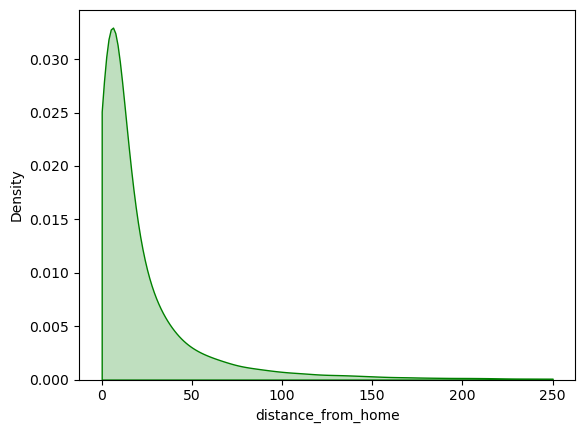

In [16]:
kde_plot("distance_from_home")

<Axes: xlabel='distance_from_last_transaction', ylabel='Density'>

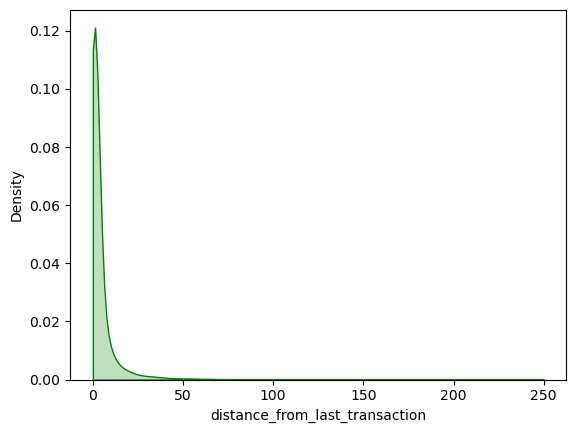

In [17]:
kde_plot("distance_from_last_transaction")

<Axes: xlabel='ratio_to_median_purchase_price', ylabel='Density'>

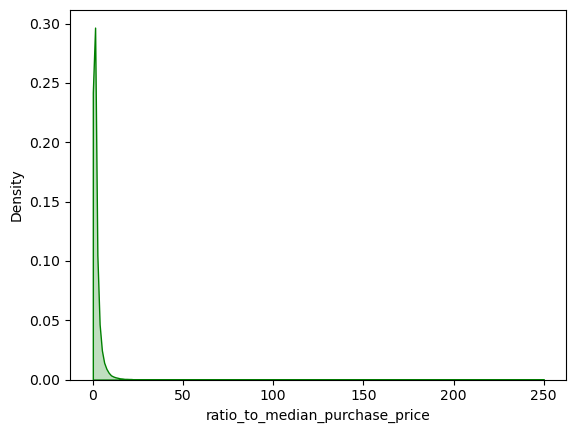

In [18]:
kde_plot("ratio_to_median_purchase_price")

<Axes: xlabel='repeat_retailer', ylabel='Density'>

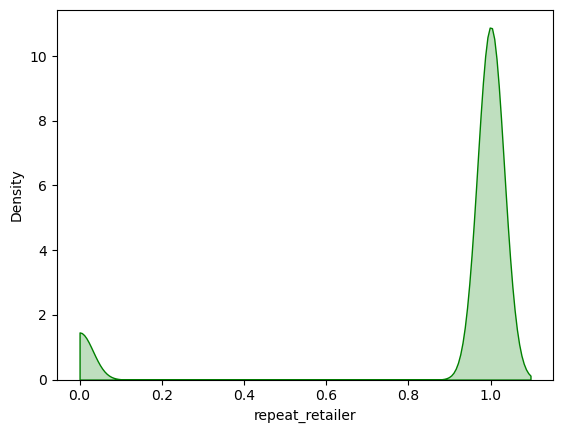

In [19]:
kde_plot("repeat_retailer")

In [20]:
def count_plot(a):
    count=df[a].value_counts()
    print("count",count)
    c=sns.countplot(x=df[a],color="paleturquoise")
    return c

count repeat_retailer
1    88208
0    11791
Name: count, dtype: int64


<Axes: xlabel='repeat_retailer', ylabel='count'>

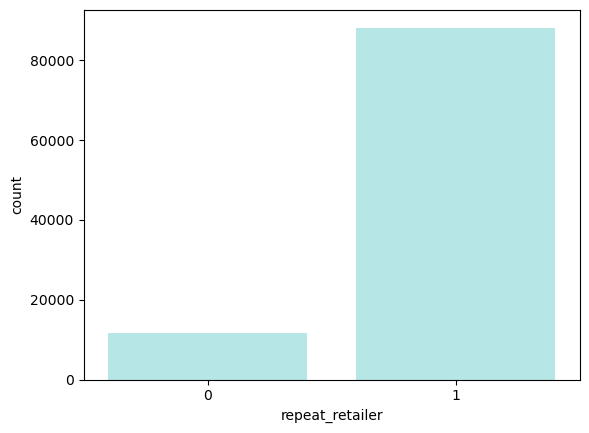

In [21]:
count_plot("repeat_retailer")

<Axes: xlabel='used_chip', ylabel='Density'>

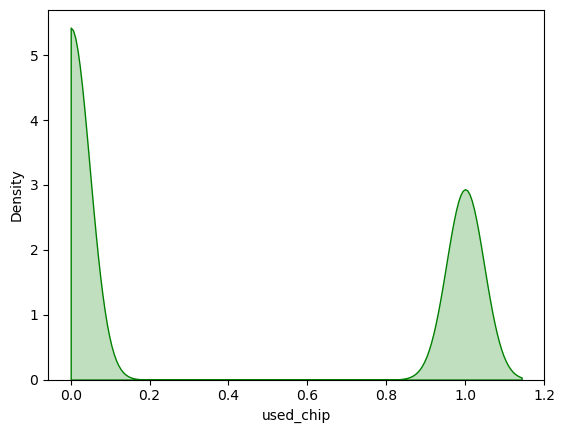

In [22]:
kde_plot("used_chip")

count used_chip
0    64893
1    35106
Name: count, dtype: int64


<Axes: xlabel='used_chip', ylabel='count'>

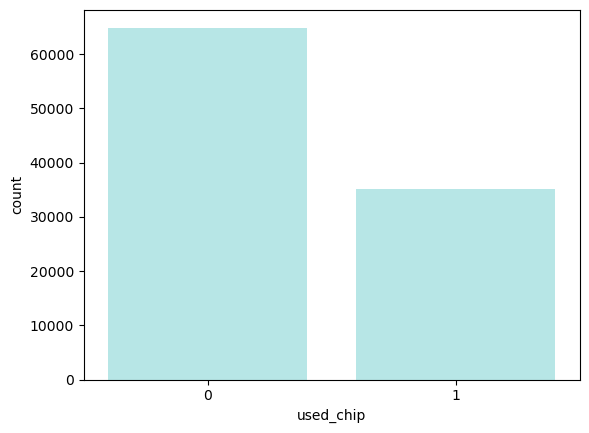

In [23]:
count_plot("used_chip")

<Axes: xlabel='used_pin_number', ylabel='Density'>

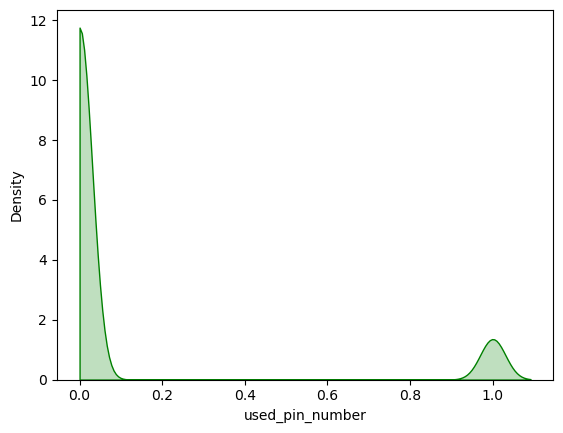

In [24]:
kde_plot("used_pin_number")

count used_pin_number
0    89674
1    10325
Name: count, dtype: int64


<Axes: xlabel='used_pin_number', ylabel='count'>

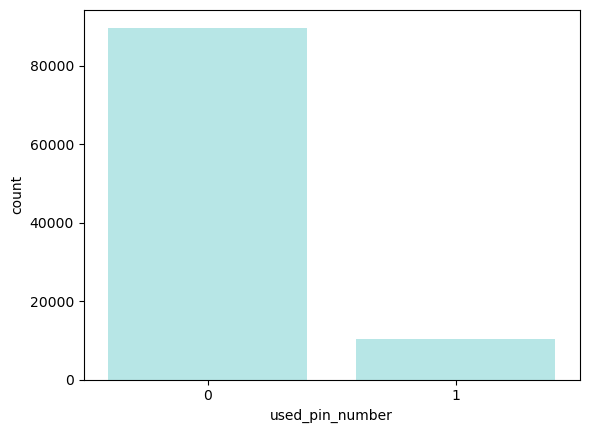

In [25]:
count_plot("used_pin_number")

<Axes: xlabel='online_order', ylabel='Density'>

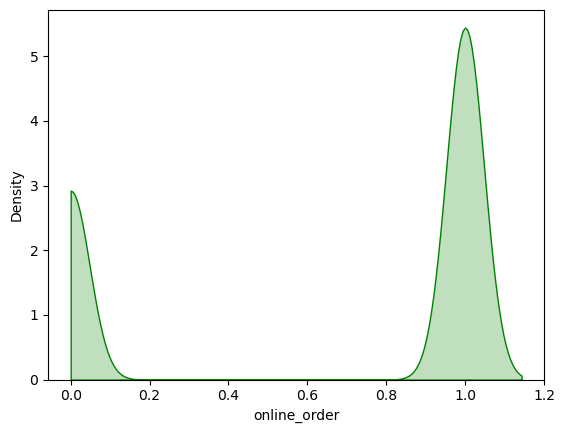

In [26]:
kde_plot("online_order")

count online_order
1    65065
0    34934
Name: count, dtype: int64


<Axes: xlabel='online_order', ylabel='count'>

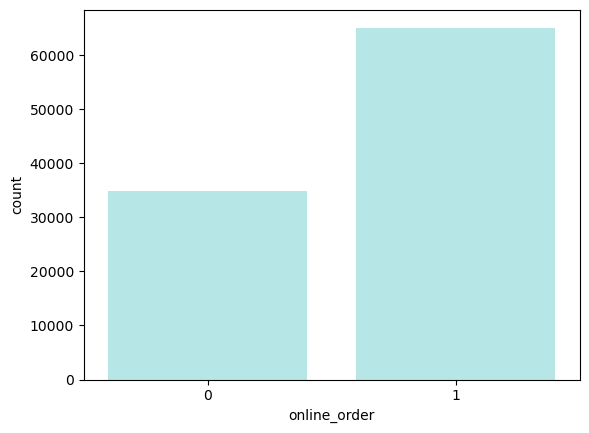

In [27]:
count_plot("online_order")

count fraud
0    91289
1     8710
Name: count, dtype: int64


<Axes: xlabel='fraud', ylabel='count'>

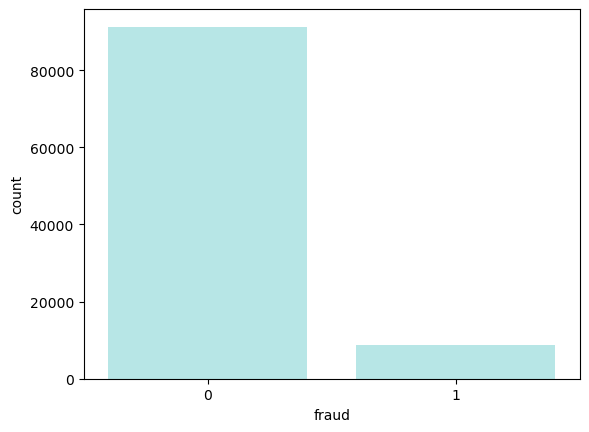

In [28]:
count_plot("fraud")

In [29]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


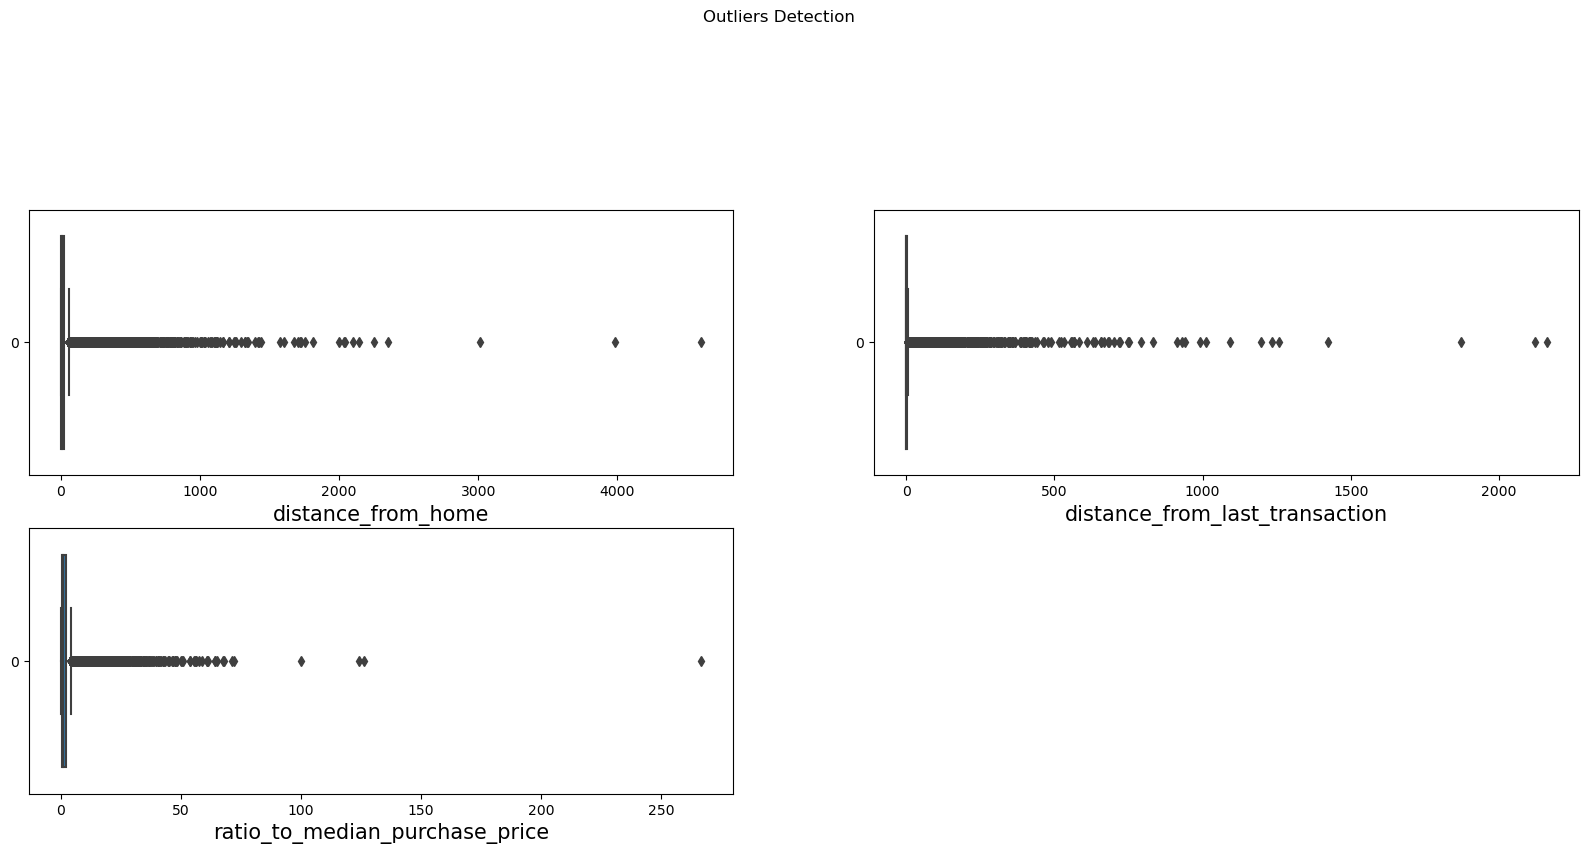

<Figure size 640x480 with 0 Axes>

In [30]:
## Checking Outliers By Calculation [BEFORE]
plt.figure(figsize=(20,20))
plt.suptitle("Outliers Detection")
pltn=1
for i in df:
    if pltn<=3:
        plt.subplot(5,2,pltn)
        sns.boxplot(df[i],orient="h")
        plt.xlabel(i,fontsize=15)
    pltn=pltn+1

plt.show()
plt.tight_layout()

# Feature Engineering

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              99999 non-null  float64
 1   distance_from_last_transaction  99999 non-null  float64
 2   ratio_to_median_purchase_price  99999 non-null  float64
 3   repeat_retailer                 99999 non-null  int64  
 4   used_chip                       99999 non-null  int64  
 5   used_pin_number                 99999 non-null  int64  
 6   online_order                    99999 non-null  int64  
 7   fraud                           99999 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 6.1 MB


In [32]:
#  handling of out liers
def Outlier(a):
    q1=df[a].quantile(0.25)
    q2=df[a].quantile(0.50)
    q3=df[a].quantile(0.75)
    iqr=q3-q1
    lower_tail=q1-1.5*iqr
    upper_tail=q3+1.5*iqr
    print(f"lower tail:{lower_tail}")#lower tail
    print(f"upper tail:{upper_tail}")#upper tail
    outliers = df[(df[a]<lower_tail)|(df[a]>upper_tail)]
    df[a]=np.where(df[a]<lower_tail,lower_tail,np.where(df[a]>upper_tail,upper_tail,df[a]))
    
    return df

In [33]:
Outlier("distance_from_home")

lower tail:-28.9312769625
upper tail:58.5250716655


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0
...,...,...,...,...,...,...,...,...
99994,1.158631,2.156257,1.387312,0,0,0,0,0
99995,1.674570,10.015549,0.618636,0,0,0,1,0
99996,16.908113,9.274847,0.251770,1,1,0,1,0
99997,6.195276,2.373588,9.652850,1,0,0,1,1


In [34]:
Outlier("distance_from_last_transaction")

lower tail:-4.260123749000001
upper tail:7.889059643000001


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0
...,...,...,...,...,...,...,...,...
99994,1.158631,2.156257,1.387312,0,0,0,0,0
99995,1.674570,7.889060,0.618636,0,0,0,1,0
99996,16.908113,7.889060,0.251770,1,1,0,1,0
99997,6.195276,2.373588,9.652850,1,0,0,1,1


In [35]:
Outlier("ratio_to_median_purchase_price")

lower tail:-1.94258192675
upper tail:4.50800173925


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0
...,...,...,...,...,...,...,...,...
99994,1.158631,2.156257,1.387312,0,0,0,0,0
99995,1.674570,7.889060,0.618636,0,0,0,1,0
99996,16.908113,7.889060,0.251770,1,1,0,1,0
99997,6.195276,2.373588,4.508002,1,0,0,1,1


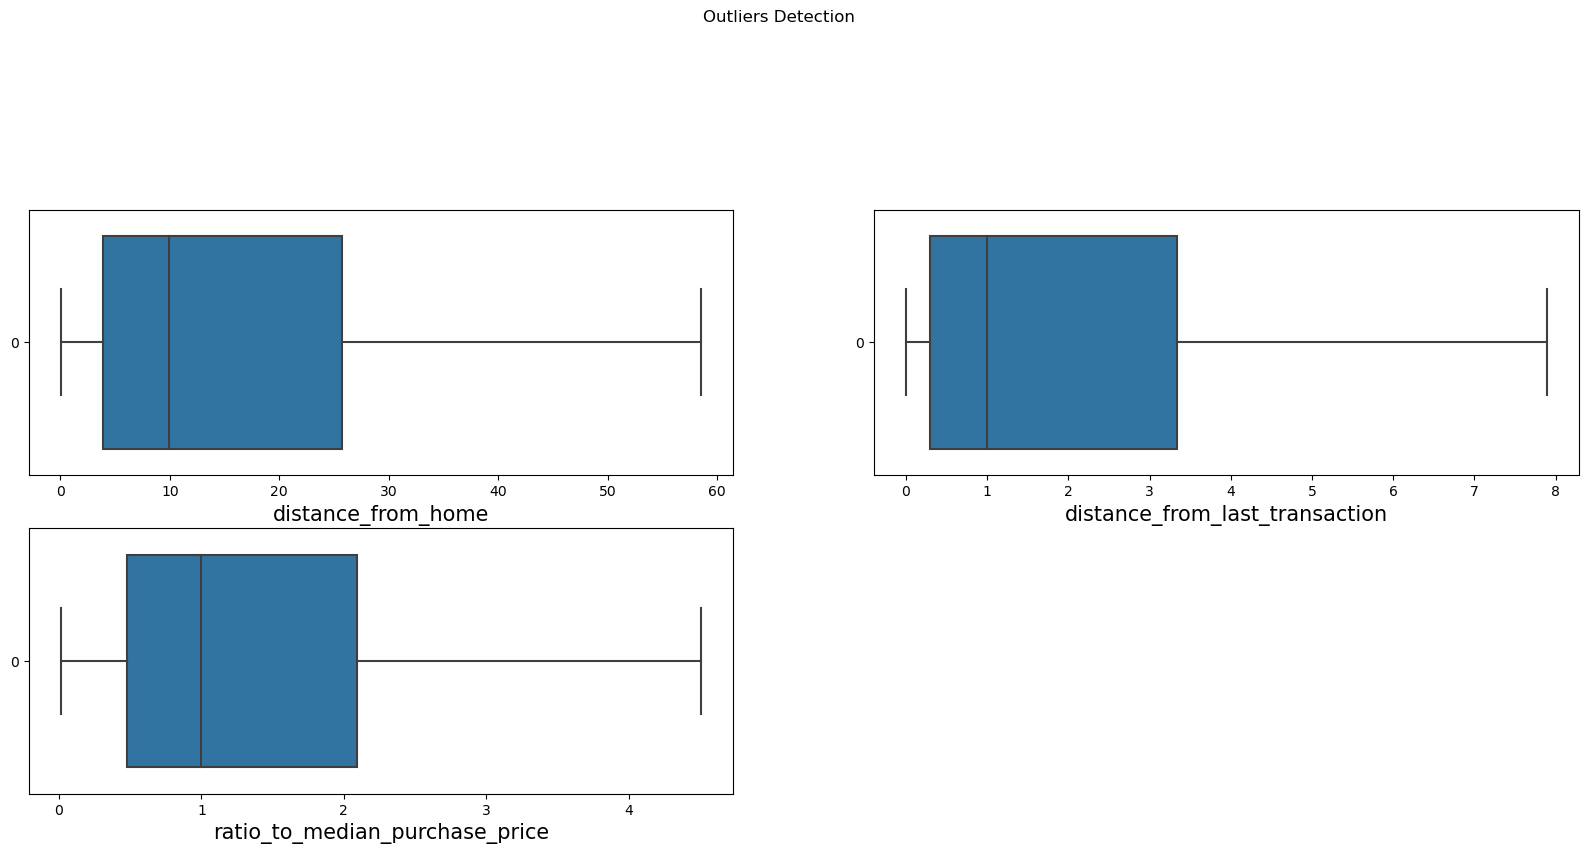

<Figure size 640x480 with 0 Axes>

In [36]:
## Checking Outliers By Calculation [AFTER]
plt.figure(figsize=(20,20))
plt.suptitle("Outliers Detection")
pltn=1
for i in df:
    if pltn <=3:
        plt.subplot(5,2,pltn)
        sns.boxplot(df[i],orient="h")
        plt.xlabel(i,fontsize=15)
    pltn=pltn+1

plt.show()
plt.tight_layout()

In [37]:
df.corr()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.003990,-0.001869,0.330054,-0.003983,-0.001930,0.000660,0.137073
distance_from_last_transaction,0.003990,1.000000,0.001917,-0.000788,-0.005516,0.004500,-0.005836,0.043844
ratio_to_median_purchase_price,-0.001869,0.001917,1.000000,-0.001926,-0.000758,0.001467,0.003035,0.487903
repeat_retailer,0.330054,-0.000788,-0.001926,1.000000,-0.002638,-0.002300,0.003505,-0.002199
used_chip,-0.003983,-0.005516,-0.000758,-0.002638,1.000000,-0.000050,-0.001624,-0.062394
used_pin_number,-0.001930,0.004500,0.001467,-0.002300,-0.000050,1.000000,0.000618,-0.101432
online_order,0.000660,-0.005836,0.003035,0.003505,-0.001624,0.000618,1.000000,0.192713
fraud,0.137073,0.043844,0.487903,-0.002199,-0.062394,-0.101432,0.192713,1.000000


<Axes: >

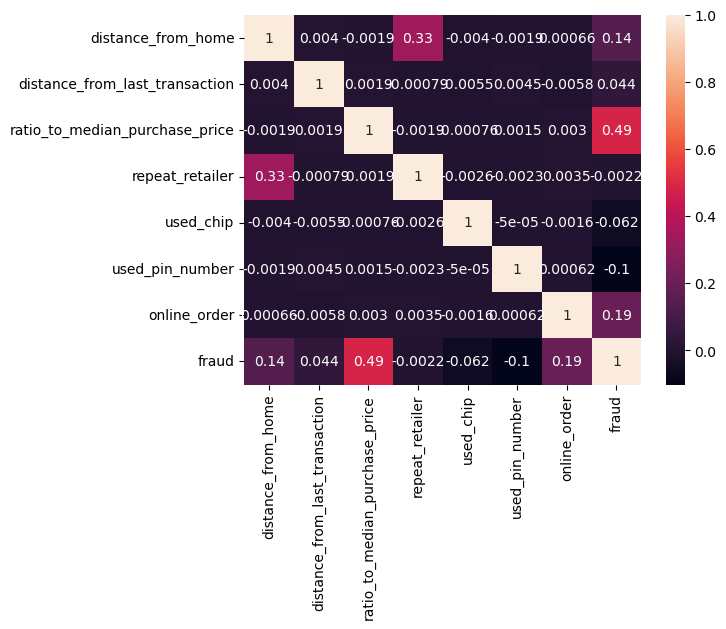

In [38]:
sns.heatmap(df.corr(),annot=True)

In [39]:
df1=df.iloc[:,:7]
df1

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1,1,0,0
1,10.829943,0.175592,1.294219,1,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1
3,2.247564,5.600044,0.362663,1,1,0,1
4,44.190936,0.566486,2.222767,1,1,0,1
...,...,...,...,...,...,...,...
99994,1.158631,2.156257,1.387312,0,0,0,0
99995,1.674570,7.889060,0.618636,0,0,0,1
99996,16.908113,7.889060,0.251770,1,1,0,1
99997,6.195276,2.373588,4.508002,1,0,0,1


# Training Test Split

In [40]:
x=df.iloc[:,:7]
y=df["fraud"]

In [41]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,stratify=y)

In [42]:
xtrain.shape

(79999, 7)

In [43]:
ytrain.shape

(79999,)

In [44]:
xtest.shape

(20000, 7)

In [45]:
ytest.shape

(20000,)

# Model Training

# Logistic Regression

In [46]:
log_reg=LogisticRegression()
log_reg_model=log_reg.fit(xtrain,ytrain)
log_reg_model

LogisticRegression()

### Model evaluation

In [47]:
ytrain_pred=log_reg_model.predict(xtrain)

In [48]:
#for training data
acc=accuracy_score(ytrain,ytrain_pred)
print(f"Accuracy:{acc}")
print("-"*50)

cnf_mat = multilabel_confusion_matrix(ytrain,ytrain_pred)
print(f"Confusion Matrix : \n{cnf_mat}")
print("-"*50)

clf_rep = classification_report(ytrain,ytrain_pred)
print("Classification Report : \n",clf_rep)


Accuracy:0.9546244328054101
--------------------------------------------------
Confusion Matrix : 
[[[ 4553  2415]
  [ 1215 71816]]

 [[71816  1215]
  [ 2415  4553]]]
--------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     73031
           1       0.79      0.65      0.71      6968

    accuracy                           0.95     79999
   macro avg       0.88      0.82      0.85     79999
weighted avg       0.95      0.95      0.95     79999



In [49]:
ytest_pred = log_reg_model.predict(xtest)

In [50]:
#for testing data
acc = accuracy_score(ytest,ytest_pred)
print(f"Accuracy : {acc}")
print("-"*50)

cnf_mat = multilabel_confusion_matrix(ytest,ytest_pred)
print(f"Confusion Matrix : \n{cnf_mat}")
print("-"*50)

clf_rep = classification_report(ytest,ytest_pred)
print("Classification Report : \n",clf_rep)

Accuracy : 0.9555
--------------------------------------------------
Confusion Matrix : 
[[[ 1163   579]
  [  311 17947]]

 [[17947   311]
  [  579  1163]]]
--------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     18258
           1       0.79      0.67      0.72      1742

    accuracy                           0.96     20000
   macro avg       0.88      0.83      0.85     20000
weighted avg       0.95      0.96      0.95     20000



## Decision Tree

In [51]:
dt_clf=DecisionTreeClassifier()
dt_clf

DecisionTreeClassifier()

In [52]:
dt_clf_model=dt_clf.fit(xtrain,ytrain)
dt_clf_model

DecisionTreeClassifier()

###  Decision Tree Model Evaluation

In [53]:
ytrain_pred=dt_clf_model.predict(xtrain)

In [54]:
# for training data
acc = accuracy_score(ytrain,ytrain_pred)
print(f"Accuracy : {acc}")
print("-"*50)

cnf_mat = confusion_matrix(ytrain,ytrain_pred)
print(f"Confusion Matrix : \n{cnf_mat}")
print("-"*50)


clf_rep = classification_report(ytrain,ytrain_pred)
print("Classification Report : \n",clf_rep)

Accuracy : 0.9998374979687246
--------------------------------------------------
Confusion Matrix : 
[[73026     5]
 [    8  6960]]
--------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     73031
           1       1.00      1.00      1.00      6968

    accuracy                           1.00     79999
   macro avg       1.00      1.00      1.00     79999
weighted avg       1.00      1.00      1.00     79999



In [55]:
#its overfitting

In [56]:
ytest_pred = dt_clf_model.predict(xtest)

In [57]:
#for testing data
acc = accuracy_score(ytest,ytest_pred)
print(f"Accuracy : {acc}")
print("-"*50)

cnf_mat = confusion_matrix(ytest,ytest_pred)
print(f"Confusion Matrix : \n{cnf_mat}")
print("-"*50)


clf_rep = classification_report(ytest,ytest_pred)
print("Classification Report : \n",clf_rep)

Accuracy : 0.9694
--------------------------------------------------
Confusion Matrix : 
[[17945   313]
 [  299  1443]]
--------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     18258
           1       0.82      0.83      0.83      1742

    accuracy                           0.97     20000
   macro avg       0.90      0.91      0.90     20000
weighted avg       0.97      0.97      0.97     20000



In [58]:
# it will plot a decision tree

# Decision Tree with Hyperparameter Tunning

In [59]:
hyperparameters = {
    "criterion" : ["entropy","gini"],
    "max_depth" :np.arange(10,20),
    "min_samples_split" : np.arange(10,20),
    "min_samples_leaf" : np.arange(10,20)
}

In [60]:
rscv=RandomizedSearchCV(dt_clf_model,hyperparameters,cv=5)

In [61]:
rscv=rscv.fit(xtrain,ytrain)
rscv

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'min_samples_leaf': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'min_samples_split': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])})

In [62]:
rscv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=13, min_samples_leaf=18,
                       min_samples_split=12)

In [63]:
dt_hyp=DecisionTreeClassifier(max_depth=15,min_samples_leaf=18,min_samples_split=13)
dt_hyp

DecisionTreeClassifier(max_depth=15, min_samples_leaf=18, min_samples_split=13)

In [64]:
dt_hyp_model=dt_hyp.fit(xtrain,ytrain)
dt_hyp_model

DecisionTreeClassifier(max_depth=15, min_samples_leaf=18, min_samples_split=13)

### DecisionTree with Hyperparameter modelevaluataion

In [65]:
ytrain_pred = dt_hyp_model.predict(xtrain)

In [66]:
#for training data
acc = accuracy_score(ytrain,ytrain_pred)
print(f"Accuracy : {acc}")
print("-"*50)

cnf_mat = confusion_matrix(ytrain,ytrain_pred)
print(f"Confusion Matrix : \n{cnf_mat}")
print("-"*50)


clf_rep = classification_report(ytrain,ytrain_pred)
print("Classification Report : \n",clf_rep)

Accuracy : 0.9788622357779472
--------------------------------------------------
Confusion Matrix : 
[[72662   369]
 [ 1322  5646]]
--------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     73031
           1       0.94      0.81      0.87      6968

    accuracy                           0.98     79999
   macro avg       0.96      0.90      0.93     79999
weighted avg       0.98      0.98      0.98     79999



In [67]:
ytest_pred = dt_hyp_model.predict(xtest)

In [68]:
#for testing data
acc = accuracy_score(ytest,ytest_pred)
print(f"Accuracy : {acc}")
print("-"*50)

cnf_mat = confusion_matrix(ytest,ytest_pred)
print(f"Confusion Matrix : \n{cnf_mat}")
print("-"*50)


clf_rep = classification_report(ytest,ytest_pred)
print("Classification Report : \n",clf_rep)

Accuracy : 0.9735
--------------------------------------------------
Confusion Matrix : 
[[18120   138]
 [  392  1350]]
--------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     18258
           1       0.91      0.77      0.84      1742

    accuracy                           0.97     20000
   macro avg       0.94      0.88      0.91     20000
weighted avg       0.97      0.97      0.97     20000



# Random Forest

In [69]:
rf_clf=RandomForestClassifier()
rf_clf_model = rf_clf.fit(xtrain,ytrain)
rf_clf_model

RandomForestClassifier()

### Random Forest Model Evaluation

In [70]:
ytrain_pred=rf_clf_model.predict(xtrain)

In [71]:
# for training data
acc=accuracy_score(ytrain,ytrain_pred)
print(f"Accuracy:{acc}")
print("-"*50)
cnf_mat = confusion_matrix(ytrain,ytrain_pred)
print(f"Confusion Matrix:\n {cnf_mat}")
print("-"*50)

clf_rep= classification_report(ytrain,ytrain_pred)
print("Classification Report:\n",clf_rep)

Accuracy:0.9998249978124727
--------------------------------------------------
Confusion Matrix:
 [[73026     5]
 [    9  6959]]
--------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     73031
           1       1.00      1.00      1.00      6968

    accuracy                           1.00     79999
   macro avg       1.00      1.00      1.00     79999
weighted avg       1.00      1.00      1.00     79999



In [72]:
# for testing data
ytest_pred=rf_clf_model.predict(xtest)

In [73]:
acc=accuracy_score(ytest,ytest_pred)
print(f"Accuracy : {acc}")
print("-"*50)

cnf_mat = confusion_matrix(ytest,ytest_pred)
print(f"Confusion Matrix:\n{cnf_mat}")
print("*"*50)

clf_rep= classification_report(ytest,ytest_pred)
print("Classificaton report:\n",clf_rep)

Accuracy : 0.9738
--------------------------------------------------
Confusion Matrix:
[[18055   203]
 [  321  1421]]
**************************************************
Classificaton report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     18258
           1       0.88      0.82      0.84      1742

    accuracy                           0.97     20000
   macro avg       0.93      0.90      0.92     20000
weighted avg       0.97      0.97      0.97     20000



# Random Forest with hyperparameter tunning

In [74]:
hyperparameters={
    "n_estimators":np.arange(20,100),
    "criterion":["entropy","gini"],
    "max_depth":np.arange(5,30),
    "min_samples_split":np.arange(5,20),
    "min_samples_leaf":np.arange(5,20)
}

In [75]:
rscv = RandomizedSearchCV(rf_clf_model,hyperparameters,cv=5)
rscv = rscv.fit(xtrain,ytrain)
rscv

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29]),
                                        'min_samples_leaf': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'min_samples_split': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'n_estimators': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
       88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [76]:
rscv.best_estimator_

RandomForestClassifier(max_depth=26, min_samples_leaf=19, min_samples_split=13,
                       n_estimators=99)

In [77]:
rf_clf_hyp=RandomForestClassifier(criterion="entropy",
                                  max_depth=26,
                                  min_samples_leaf=15,
                                  min_samples_split=8,
                                  n_estimators=82,
                                 )
rf_clf_hyp_model=rf_clf_hyp.fit(xtrain,ytrain)
rf_clf_hyp_model

RandomForestClassifier(criterion='entropy', max_depth=26, min_samples_leaf=15,
                       min_samples_split=8, n_estimators=82)

### Random Forest with hyperparameter Model Evaluation

In [78]:
ytrain_pred=rf_clf_hyp_model.predict(xtrain)

In [79]:
# for training data
acc=accuracy_score(ytrain,ytrain_pred)
print(f"Accuracy:{acc}")
print("-"*50)

cnf_mat=confusion_matrix(ytrain,ytrain_pred)
print(F"confusion Matrix:\n{cnf_mat}")
print("-"*50)

clf_rep=classification_report(ytrain,ytrain_pred)
print("classification report:\n",clf_rep)


Accuracy:0.9809872623407793
--------------------------------------------------
confusion Matrix:
[[72794   237]
 [ 1284  5684]]
--------------------------------------------------
classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     73031
           1       0.96      0.82      0.88      6968

    accuracy                           0.98     79999
   macro avg       0.97      0.91      0.94     79999
weighted avg       0.98      0.98      0.98     79999



In [80]:
ytest_pred=rf_clf_hyp_model.predict(xtest)


In [81]:
# for testing data
acc= accuracy_score(ytest,ytest_pred)
print(f"Accuracy:{acc}")
print("-"*50)

cnf_mat=confusion_matrix(ytest,ytest_pred)
print(f"Confusion Matrix:\n{cnf_mat}")
print("-"*50)

clf_rep=classification_report(ytest,ytest_pred)
print("classification report:\n",clf_rep)

Accuracy:0.9737
--------------------------------------------------
Confusion Matrix:
[[18152   106]
 [  420  1322]]
--------------------------------------------------
classification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     18258
           1       0.93      0.76      0.83      1742

    accuracy                           0.97     20000
   macro avg       0.95      0.88      0.91     20000
weighted avg       0.97      0.97      0.97     20000



#  Ada Boost

In [82]:
ad_clf= AdaBoostClassifier()
ad_clf_model= ad_clf.fit(xtrain,ytrain)
ad_clf_model

AdaBoostClassifier()

### Ada Boost Model Evaluation

In [83]:
ytrain_pred=ad_clf_model.predict(xtrain)

In [84]:
#for training Data
acc=accuracy_score(ytrain,ytrain_pred)
print(f"Accuracy:{acc}")
print("-"*50)

cnf_mat=confusion_matrix(ytrain,ytrain_pred)
print(f"Confusion Matrix:\n{cnf_mat}")
print("-"*50)

clf_rep=classification_report(ytrain,ytrain_pred)
print("Classification Report:\n",clf_rep)

Accuracy:0.9692121151514393
--------------------------------------------------
Confusion Matrix:
[[72450   581]
 [ 1882  5086]]
--------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     73031
           1       0.90      0.73      0.81      6968

    accuracy                           0.97     79999
   macro avg       0.94      0.86      0.89     79999
weighted avg       0.97      0.97      0.97     79999



In [85]:
ytest_pred = ad_clf_model.predict(xtest)

In [86]:
# for testing data
acc=accuracy_score(ytest,ytest_pred)
print(f"Accuracy:{acc}")
print("-"*50)

cnf_mat=confusion_matrix(ytest,ytest_pred)
print(f"Confusion Matrix:\n{cnf_mat}")
print("-"*50)

clf_rep=classification_report(ytest,ytest_pred)
print("Classification report:\n",clf_rep)

Accuracy:0.97035
--------------------------------------------------
Confusion Matrix:
[[18124   134]
 [  459  1283]]
--------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     18258
           1       0.91      0.74      0.81      1742

    accuracy                           0.97     20000
   macro avg       0.94      0.86      0.90     20000
weighted avg       0.97      0.97      0.97     20000



# AdaBoost with Hyperparameter Tunning

In [87]:
hyp={"n_estimators":np.arange(10,50),
    "learning_rate":np.random.rand(5)}

In [88]:
rcvs= RandomizedSearchCV(ad_clf_model,hyp,cv=5)
rcvs.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(),
                   param_distributions={'learning_rate': array([0.06451748, 0.35324177, 0.40458735, 0.40355311, 0.93560785]),
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49])})

In [89]:
rcvs.best_estimator_

AdaBoostClassifier(learning_rate=0.4045873462067656, n_estimators=34)

In [90]:
ad_clf_hyp=AdaBoostClassifier(learning_rate=0.9398986310532169,n_estimators=19)
ad_clf_hyp_model=ad_clf_hyp.fit(xtrain,ytrain)
ad_clf_hyp_model

AdaBoostClassifier(learning_rate=0.9398986310532169, n_estimators=19)

### Ada Boost with hyperparameter Model Evaluation

In [91]:
ytarin_pred=ad_clf_hyp_model.predict(xtrain)

In [92]:
# for training data
acc = accuracy_score(ytrain,ytrain_pred)
print(f"Accuracy : {acc}")
print("-"*50)

cnf_mat = confusion_matrix(ytrain,ytrain_pred)
print(f"Confusion Matrix : \n{cnf_mat}")
print("-"*50)


clf_rep = classification_report(ytrain,ytrain_pred)
print("Classification Report : \n",clf_rep)

Accuracy : 0.9692121151514393
--------------------------------------------------
Confusion Matrix : 
[[72450   581]
 [ 1882  5086]]
--------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     73031
           1       0.90      0.73      0.81      6968

    accuracy                           0.97     79999
   macro avg       0.94      0.86      0.89     79999
weighted avg       0.97      0.97      0.97     79999



In [93]:
ytest_pred=ad_clf_hyp_model.predict(xtest)

In [94]:
#for testing data
acc = accuracy_score(ytest,ytest_pred)
print(f"Accuracy : {acc}")
print("-"*50)

cnf_mat = confusion_matrix(ytest,ytest_pred)
print(f"Confusion Matrix : \n{cnf_mat}")
print("-"*50)


clf_rep = classification_report(ytest,ytest_pred)
print("Classification Report : \n",clf_rep)

Accuracy : 0.9734
--------------------------------------------------
Confusion Matrix : 
[[18195    63]
 [  469  1273]]
--------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     18258
           1       0.95      0.73      0.83      1742

    accuracy                           0.97     20000
   macro avg       0.96      0.86      0.91     20000
weighted avg       0.97      0.97      0.97     20000



# SVM(Support Vector Machines)

###  SVM(Support Vector Machines) with Model training

In [95]:
ytest_pred=svc_model.predict(xtest)

NameError: name 'svc_model' is not defined

#  SVC with Hyperparameter tunning

In [ ]:
# hyp={"kernel":["linear","rbf"],
#    "C":np.arange(1,10)}

In [ ]:
# gscv=RandomizedSearchCV(svc_model,hyp,cv=5)
# gscv.fit(xtrain,ytrain)

In [ ]:
# gscv.best_estimator_

In [ ]:
# svc=SVC(C=6)
# svc_hyp_model=svc.fit(xtrain,ytrain)
# svc_hyp_model

In [ ]:
# ytrain_pred = svc_hyp_model.predict(xtrain)

 # save finalized model (Decision Tree with Hyperparameter Tunning)

In [ ]:
import pickle 
with open("final_model.pkl","wb") as file:
    pickle.dump(dt_hyp_model,file)

In [ ]:
with open("final_model.pkl","rb")as file:
    final_model=pickle.load(file)

In [ ]:
test_data=df.head(2).iloc[:,:7]
test_data

In [ ]:
prediction=final_model.predict(test_data)
if prediction[0]==0:
    print("safe transiction")
else:
    print("Fraud transiction")

In [ ]:
# function to check fraud transiction 

In [ ]:
def Check_Fraud(distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order):
    test_data=pd.DataFrame({"distance_from_home":[distance_from_home],
                          "distance_from_last_transaction":[distance_from_last_transaction],
                          "ratio_to_median_purchase_price":[ratio_to_median_purchase_price],
                          "repeat_retailer":[repeat_retailer],
                          "used_chip":[used_chip],
                          "used_pin_number":[used_pin_number],
                          "online_order":[online_order]})
    with open("final_model.pkl","rb") as file:
        final_model = pickle.load(file)
        prediction=final_model.predict(test_data)
    if prediction==0:
        print(f"{prediction}:Save Transiction")
    else:
        print(f"{prediction}:Fraud Transiction")

In [ ]:
# test of Function

In [ ]:
Check_Fraud(57.877857,0.311140,1.945940,1,1,0,0)

In [ ]:
Check_Fraud(43.637384,7.889060,4.108374,1,0,0,1)